# Load

In [1]:
!pip install xgboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 253.9/253.9 MB 1.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 291.7/291.7 MB 1.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import gc

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv(r'/content/drive/MyDrive/open/iM_Îç∞Ïù¥ÏΩò_Ïú†ÏÇ¨Ïª¨Îüº.csv')

In [5]:
# 'Unnamed: 0' Ïª¨Îüº Ï†úÍ±∞
df.drop(columns=['Unnamed: 0'], inplace=True)

# Í≤∞Í≥º ÌôïÏù∏
print(df.columns)


Index(['Í∏∞Ï§ÄÎÖÑÏõî', 'ID', '_1ÏàúÏúÑÏóÖÏ¢Ö', 'Ï¥ùÏù¥Ïö©Í±¥Ïàò', 'Ï¥ùÏù¥Ïö©Í∏àÏï°', 'Ïó∞Î†π', 'ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú', 'Segment',
       'Í±∞Ï£ºÏãúÎèÑÎ™Ö', 'ÏõîÌèâÍ∑†ÏûîÏï°', 'ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÍ∏àÏï°'],
      dtype='object')


In [6]:
# Í≥†Í∞ùÎì±Í∏â Í∞íÏùò ÎπÑÏú® Í≥ÑÏÇ∞ (normalize=True ‚Üí ÎπÑÏú®)
grade_ratio = df['Segment'].value_counts(normalize=True, dropna=False)

# Î∞±Î∂ÑÏú®Î°ú Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨
grade_ratio = (grade_ratio * 100).round(2)

# Ï∂úÎ†•
print("üìä Segment Î∂ÑÌè¨ ÎπÑÏú® (%):")
print(grade_ratio)


üìä Segment Î∂ÑÌè¨ ÎπÑÏú® (%):
Segment
E    80.09
D    14.55
C     5.32
A     0.04
B     0.01
Name: proportion, dtype: float64


# EDA

In [ ]:
df.head(5)

Í∏∞Ï§ÄÎÖÑÏõî            ID _1ÏàúÏúÑÏóÖÏ¢Ö  Ï¥ùÏù¥Ïö©Í±¥Ïàò  Ï¥ùÏù¥Ïö©Í∏àÏï°   Ïó∞Î†π  ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú Segment Í±∞Ï£ºÏãúÎèÑÎ™Ö  \
0  201807  TRAIN_000000     ÎÇ©Î∂Ä     11  14204  40ÎåÄ       2       D    ÏÑúÏö∏   
1  201807  TRAIN_000001     ÏáºÌïë     13   2862  30ÎåÄ       1       E    Í≤ΩÍ∏∞   
2  201807  TRAIN_000002     ÏáºÌïë     12  20160  30ÎåÄ       1       C    ÏÑúÏö∏   
3  201807  TRAIN_000003     ÏáºÌïë      6  14176  40ÎåÄ       2       D    Î∂ÄÏÇ∞   
4  201807  TRAIN_000004    NaN     -2      0  40ÎåÄ       2       E    Í¥ëÏ£º   

   ÏõîÌèâÍ∑†ÏûîÏï°  ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÍ∏àÏï°  
0  17237           0  
1   7967       76723  
2  59917       95094  
3  27854           0  
4      0           0

In [ ]:
df['Ïó∞Î†π'].unique()

array(['40ÎåÄ', '30ÎåÄ', '20ÎåÄ', '60ÎåÄ', '50ÎåÄ', '70ÎåÄÏù¥ÏÉÅ'], dtype=object)

In [ ]:
# ÌöåÏõêÏ†ïÎ≥¥[month] - Í∏∞Ï§ÄÎÖÑÏõî, ID, Ïó∞Î†π, ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú, Segment, Í±∞Ï£ºÏãúÎèÑÎ™Ö
# ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥[month] - _1ÏàúÏúÑÏóÖÏ¢Ö, Ï¥ùÏù¥Ïö©Í±¥Ïàò, Ï¥ùÏù¥Ïö©Í∏àÏï°, ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÍ∏àÏï°
# ÏûîÏï°Ï†ïÎ≥¥[month] - ÏõîÌèâÍ∑†ÏûîÏï°

In [ ]:
cols = ['Í∏∞Ï§ÄÎÖÑÏõî', 'ID', '_1ÏàúÏúÑÏóÖÏ¢Ö', 'Ï¥ùÏù¥Ïö©Í±¥Ïàò', 'Ï¥ùÏù¥Ïö©Í∏àÏï°',
        'Ïó∞Î†π', 'ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú', 'Segment', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö',
        'ÏõîÌèâÍ∑†ÏûîÏï°', 'ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÍ∏àÏï°']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 11 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Í∏∞Ï§ÄÎÖÑÏõî        int64 
 1   ID          object
 2   _1ÏàúÏúÑÏóÖÏ¢Ö      object
 3   Ï¥ùÏù¥Ïö©Í±¥Ïàò       int64 
 4   Ï¥ùÏù¥Ïö©Í∏àÏï°       int64 
 5   Ïó∞Î†π          object
 6   ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú      int64 
 7   Segment     object
 8   Í±∞Ï£ºÏãúÎèÑÎ™Ö       object
 9   ÏõîÌèâÍ∑†ÏûîÏï°       int64 
 10  ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÍ∏àÏï°  int64 
dtypes: int64(6), object(5)
memory usage: 201.4+ MB


# ÏπºÎüº ÏàòÏ†ï

In [ ]:
df.rename(columns={
    'Í∏∞Ï§ÄÎÖÑÏõî': 'Í±∞ÎûòÎÖÑÏõî',
    'ID':'Í≥†Í∞ùID',
    'Ï¥ùÏù¥Ïö©Í±¥Ïàò':'ÏäπÏù∏Í±¥Ïàò',
    'Ï¥ùÏù¥Ïö©Í∏àÏï°':'ÏäπÏù∏Í∏àÏï°',
    'Ïó∞Î†π': 'Ïó∞Î†πÎåÄ',
    'Segment':'Í≥†Í∞ùÎì±Í∏â',
    'ÏõîÌèâÍ∑†ÏûîÏï°':'ÏàòÏã†_ÏöîÍµ¨Î∂àÏòàÍ∏à',
    'ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÍ∏àÏï°':'ÎåÄÏ∂úÍ∏àÏï°'

}, inplace=True)

In [ ]:
df.head(5)

Í±∞ÎûòÎÖÑÏõî          Í≥†Í∞ùID _1ÏàúÏúÑÏóÖÏ¢Ö  ÏäπÏù∏Í±¥Ïàò   ÏäπÏù∏Í∏àÏï°  Ïó∞Î†πÎåÄ  ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú Í≥†Í∞ùÎì±Í∏â Í±∞Ï£ºÏãúÎèÑÎ™Ö  ÏàòÏã†_ÏöîÍµ¨Î∂àÏòàÍ∏à  \
0  201807  TRAIN_000000     ÎÇ©Î∂Ä    11  14204  40ÎåÄ       2    D    ÏÑúÏö∏     17237   
1  201807  TRAIN_000001     ÏáºÌïë    13   2862  30ÎåÄ       1    E    Í≤ΩÍ∏∞      7967   
2  201807  TRAIN_000002     ÏáºÌïë    12  20160  30ÎåÄ       1    C    ÏÑúÏö∏     59917   
3  201807  TRAIN_000003     ÏáºÌïë     6  14176  40ÎåÄ       2    D    Î∂ÄÏÇ∞     27854   
4  201807  TRAIN_000004    NaN    -2      0  40ÎåÄ       2    E    Í¥ëÏ£º         0   

    ÎåÄÏ∂úÍ∏àÏï°  
0      0  
1  76723  
2  95094  
3      0  
4      0

# ÏπºÎüº Ï†úÍ±∞

In [ ]:
# '_1ÏàúÏúÑÏóÖÏ¢Ö' Ïª¨Îüº Ï†úÍ±∞
df.drop(columns=['_1ÏàúÏúÑÏóÖÏ¢Ö'], inplace=True)
# Í≤∞Í≥º ÌôïÏù∏
print(df.columns)

Index(['Í±∞ÎûòÎÖÑÏõî', 'Í≥†Í∞ùID', 'ÏäπÏù∏Í±¥Ïàò', 'ÏäπÏù∏Í∏àÏï°', 'Ïó∞Î†πÎåÄ', 'ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú', 'Í≥†Í∞ùÎì±Í∏â', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö',
       'ÏàòÏã†_ÏöîÍµ¨Î∂àÏòàÍ∏à', 'ÎåÄÏ∂úÍ∏àÏï°'],
      dtype='object')


In [ ]:
df.head(5)

Í±∞ÎûòÎÖÑÏõî          Í≥†Í∞ùID  ÏäπÏù∏Í±¥Ïàò   ÏäπÏù∏Í∏àÏï°  Ïó∞Î†πÎåÄ  ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú Í≥†Í∞ùÎì±Í∏â Í±∞Ï£ºÏãúÎèÑÎ™Ö  ÏàòÏã†_ÏöîÍµ¨Î∂àÏòàÍ∏à   ÎåÄÏ∂úÍ∏àÏï°
0  201807  TRAIN_000000    11  14204  40ÎåÄ       2    D    ÏÑúÏö∏     17237      0
1  201807  TRAIN_000001    13   2862  30ÎåÄ       1    E    Í≤ΩÍ∏∞      7967  76723
2  201807  TRAIN_000002    12  20160  30ÎåÄ       1    C    ÏÑúÏö∏     59917  95094
3  201807  TRAIN_000003     6  14176  40ÎåÄ       2    D    Î∂ÄÏÇ∞     27854      0
4  201807  TRAIN_000004    -2      0  40ÎåÄ       2    E    Í¥ëÏ£º         0      0

# ÏπºÎüº Í∞í Î≤îÏ£ºÌôî

In [ ]:
def categorize_usage(x):
    if x < 0:
        return 'Í±∞ÎûòÏ∑®ÏÜå'
    elif x <= 5:
        return '5Î≤àÏù¥Ìïò'
    elif x <= 10:
        return '5Î≤àÏ¥àÍ≥º 10Î≤àÏù¥Ìïò'
    elif x <= 15:
        return '10Î≤àÏ¥àÍ≥º 15Î≤àÏù¥Ìïò'
    elif x <= 20:
        return '15Î≤àÏ¥àÍ≥º 20Î≤àÏù¥Ìïò'
    else:
        return '20Î≤à Ï¥àÍ≥º'

# Ï†ÅÏö©
df['ÏäπÏù∏Í±¥Ïàò'] = df['ÏäπÏù∏Í±¥Ïàò'].apply(categorize_usage)

# Í≤∞Í≥º ÌôïÏù∏
print(df['ÏäπÏù∏Í±¥Ïàò'].value_counts())


ÏäπÏù∏Í±¥Ïàò
20Î≤à Ï¥àÍ≥º         762352
5Î≤àÏù¥Ìïò           656502
Í±∞ÎûòÏ∑®ÏÜå           396514
5Î≤àÏ¥àÍ≥º 10Î≤àÏù¥Ìïò     246448
10Î≤àÏ¥àÍ≥º 15Î≤àÏù¥Ìïò    186666
15Î≤àÏ¥àÍ≥º 20Î≤àÏù¥Ìïò    151518
Name: count, dtype: int64


In [ ]:
df.head(5)

Í±∞ÎûòÎÖÑÏõî          Í≥†Í∞ùID  ÏäπÏù∏Í±¥Ïàò   ÏäπÏù∏Í∏àÏï°  Ïó∞Î†πÎåÄ  ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú  Í≥†Í∞ùÎì±Í∏â  ÏàòÏã†_ÏöîÍµ¨Î∂àÏòàÍ∏à   ÎåÄÏ∂úÍ∏àÏï°  \
0 2018-07-01  TRAIN_000000     2  14204    3       2     3     17237      0   
1 2018-07-01  TRAIN_000001     2   2862    2       1     4      7967  76723   
2 2018-07-01  TRAIN_000002     2  20160    2       1     2     59917  95094   
3 2018-07-01  TRAIN_000003     1  14176    3       2     3     27854      0   
4 2018-07-01  TRAIN_000004     5      0    3       2     4         0      0   

   Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÍ∏∞  ...  Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÎåÄÏ†Ñ  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Î∂ÄÏÇ∞  Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÏÑúÏö∏  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïö∏ÏÇ∞  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïù∏Ï≤ú  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†ÑÎÇ®  \
0     False  ...     False     False      True     False     False     False   
1      True  ...     False     False     False     False     False     False   
2     False  ...     False     False      True     False     False     False   
3     False  ...     False      True     False     False     False     False   
4     False  ...     False     False     False     False     False     False   

   Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†ÑÎ∂Å  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†úÏ£º  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï∂©ÎÇ®  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï∂©Î∂Å  
0     False     False     False     False  
1     False     False     False     False  
2     False     False     False     False  
3     False     False     False     False  
4     False     False     False     False  

[5 rows x 24 columns]

In [ ]:
df['ÏäπÏù∏Í±¥Ïàò'].unique()

array(['10Î≤àÏ¥àÍ≥º 15Î≤àÏù¥Ìïò', '5Î≤àÏ¥àÍ≥º 10Î≤àÏù¥Ìïò', 'Í±∞ÎûòÏ∑®ÏÜå', '5Î≤àÏù¥Ìïò', '20Î≤àÏ¥àÍ≥º',
       '15Î≤àÏ¥àÍ≥º 20Î≤àÏù¥Ìïò'], dtype=object)

In [ ]:
df['Ïó∞Î†πÎåÄ'].unique()

array(['40ÎåÄ', '30ÎåÄ', '20ÎåÄ', '60ÎåÄ', '50ÎåÄ', '70ÎåÄÏù¥ÏÉÅ'], dtype=object)

# Ïó∞Î†πÎåÄ ÏàòÏ†ï

In [ ]:
df['Ïó∞Î†πÎåÄ'] = df['Ïó∞Î†πÎåÄ'].replace({'60ÎåÄ': '60ÎåÄÏù¥ÏÉÅ', '70ÎåÄÏù¥ÏÉÅ': '60ÎåÄÏù¥ÏÉÅ'})

# datetime ÌòïÎ≥ÄÌôò

In [ ]:
# 'Í±∞ÎûòÎÖÑÏõî'ÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïú Îí§ datetime Ï≤òÎ¶¨
df['Í±∞ÎûòÎÖÑÏõî'] = pd.to_datetime(df['Í±∞ÎûòÎÖÑÏõî'].astype(str), format='%Y%m')

# ÎùºÎ≤® Ïù∏ÏΩîÎî©

In [ ]:
# ÏäπÏù∏Í±¥Ïàò ÏßÄÏ†ï Ïù∏ÏΩîÎî©
usage_map = {
    '5Î≤àÏù¥Ìïò': 0,
    '5Î≤àÏ¥àÍ≥º 10Î≤àÏù¥Ìïò': 1,
    '10Î≤àÏ¥àÍ≥º 15Î≤àÏù¥Ìïò': 2,
    '15Î≤àÏ¥àÍ≥º 20Î≤àÏù¥Ìïò': 3,
    '20Î≤à Ï¥àÍ≥º': 4,
    'Í±∞ÎûòÏ∑®ÏÜå': 5
}
df['ÏäπÏù∏Í±¥Ïàò'] = df['ÏäπÏù∏Í±¥Ïàò'].map(usage_map)

# Ïó∞Î†πÎåÄ ÏßÄÏ†ï Ïù∏ÏΩîÎî©
age_map = {
    '20ÎåÄ': 1,
    '30ÎåÄ': 2,
    '40ÎåÄ': 3,
    '50ÎåÄ': 4,
    '60ÎåÄÏù¥ÏÉÅ': 5,
}
df['Ïó∞Î†πÎåÄ'] = df['Ïó∞Î†πÎåÄ'].map(age_map)

# Í≥†Í∞ùÎì±Í∏â ÏßÄÏ†ï Ïù∏ÏΩîÎî©
grade_map = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4
}
df['Í≥†Í∞ùÎì±Í∏â'] = df['Í≥†Í∞ùÎì±Í∏â'].map(grade_map)


In [ ]:
print(df[['ÏäπÏù∏Í±¥Ïàò', 'Ïó∞Î†πÎåÄ', 'Í≥†Í∞ùÎì±Í∏â']].head())

   ÏäπÏù∏Í±¥Ïàò  Ïó∞Î†πÎåÄ  Í≥†Í∞ùÎì±Í∏â
0     2    3     3
1     2    2     4
2     2    2     2
3     1    3     3
4     5    3     4


# ÏõêÌï´ Ïù∏ÏΩîÎî©

In [ ]:
onehot_cols = ['Í±∞Ï£ºÏãúÎèÑÎ™Ö']

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 24 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Í±∞ÎûòÎÖÑÏõî      datetime64[ns]
 1   Í≥†Í∞ùID      object        
 2   ÏäπÏù∏Í±¥Ïàò      int64         
 3   ÏäπÏù∏Í∏àÏï°      int64         
 4   Ïó∞Î†πÎåÄ       int64         
 5   ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú    int64         
 6   Í≥†Í∞ùÎì±Í∏â      int64         
 7   ÏàòÏã†_ÏöîÍµ¨Î∂àÏòàÍ∏à  int64         
 8   ÎåÄÏ∂úÍ∏àÏï°      int64         
 9   Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÍ∏∞  bool          
 10  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÎÇ®  bool          
 11  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÎ∂Å  bool          
 12  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í¥ëÏ£º  bool          
 13  Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÎåÄÍµ¨  bool          
 14  Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÎåÄÏ†Ñ  bool          
 15  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Î∂ÄÏÇ∞  bool          
 16  Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÏÑúÏö∏  bool          
 17  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïö∏ÏÇ∞  bool          
 18  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïù∏Ï≤ú  bool          
 19  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†ÑÎÇ®  bool        

In [ ]:
# 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÏÑ∏Ï¢Ö' Ïª¨Îüº Ï†úÍ±∞
df.drop(columns=['Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÏÑ∏Ï¢Ö'], inplace=True)
# Í≤∞Í≥º ÌôïÏù∏
print(df.columns)

Index(['Í±∞ÎûòÎÖÑÏõî', 'Í≥†Í∞ùID', 'ÏäπÏù∏Í±¥Ïàò', 'ÏäπÏù∏Í∏àÏï°', 'Ïó∞Î†πÎåÄ', 'ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú', 'Í≥†Í∞ùÎì±Í∏â', 'ÏàòÏã†_ÏöîÍµ¨Î∂àÏòàÍ∏à',
       'ÎåÄÏ∂úÍ∏àÏï°', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÍ∏∞', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÎÇ®', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÎ∂Å', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í¥ëÏ£º', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÎåÄÍµ¨',
       'Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÎåÄÏ†Ñ', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Î∂ÄÏÇ∞', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÏÑúÏö∏', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïö∏ÏÇ∞', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïù∏Ï≤ú', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†ÑÎÇ®',
       'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†ÑÎ∂Å', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†úÏ£º', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï∂©ÎÇ®', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï∂©Î∂Å'],
      dtype='object')


In [ ]:
# Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Í∞í Í∞úÏàò Ï∂úÎ†•
missing_count = df.isnull().sum()
missing_count = missing_count.sort_values(ascending=False)  # Í≤∞Ï∏°Ïπò ÎßéÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨
print(missing_count)


Í±∞ÎûòÎÖÑÏõî        0
Í≥†Í∞ùID        0
ÏäπÏù∏Í±¥Ïàò        0
ÏäπÏù∏Í∏àÏï°        0
Ïó∞Î†πÎåÄ         0
ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú      0
Í≥†Í∞ùÎì±Í∏â        0
ÏàòÏã†_ÏöîÍµ¨Î∂àÏòàÍ∏à    0
ÎåÄÏ∂úÍ∏àÏï°        0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÍ∏∞    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÎÇ®    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÎ∂Å    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í¥ëÏ£º    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÎåÄÍµ¨    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÎåÄÏ†Ñ    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Î∂ÄÏÇ∞    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÏÑúÏö∏    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïö∏ÏÇ∞    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïù∏Ï≤ú    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†ÑÎÇ®    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†ÑÎ∂Å    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†úÏ£º    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï∂©ÎÇ®    0
Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï∂©Î∂Å    0
dtype: int64


In [ ]:
df.to_csv('/content/drive/MyDrive/open/Îç∞Ïù¥ÏΩòÏ†ÑÏ≤òÎ¶¨.csv', index=False)

# Ï†ÄÏû•Ìïú ÌååÏùº Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_csv('/content/drive/MyDrive/open/Îç∞Ïù¥ÏΩòÏ†ÑÏ≤òÎ¶¨.csv', encoding='utf-8-sig')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 24 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Í±∞ÎûòÎÖÑÏõî      object
 1   Í≥†Í∞ùID      object
 2   ÏäπÏù∏Í±¥Ïàò      int64 
 3   ÏäπÏù∏Í∏àÏï°      int64 
 4   Ïó∞Î†πÎåÄ       int64 
 5   ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú    int64 
 6   Í≥†Í∞ùÎì±Í∏â      int64 
 7   ÏàòÏã†_ÏöîÍµ¨Î∂àÏòàÍ∏à  int64 
 8   ÎåÄÏ∂úÍ∏àÏï°      int64 
 9   Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÍ∏∞  bool  
 10  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÎÇ®  bool  
 11  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÎ∂Å  bool  
 12  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í¥ëÏ£º  bool  
 13  Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÎåÄÍµ¨  bool  
 14  Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÎåÄÏ†Ñ  bool  
 15  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Î∂ÄÏÇ∞  bool  
 16  Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÏÑúÏö∏  bool  
 17  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïö∏ÏÇ∞  bool  
 18  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïù∏Ï≤ú  bool  
 19  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†ÑÎÇ®  bool  
 20  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†ÑÎ∂Å  bool  
 21  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†úÏ£º  bool  
 22  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï∂©ÎÇ®  bool  
 23  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï∂©Î∂Å  bool  
dtypes: bool(15), int64(7), o

In [ ]:
# Í≥†Í∞ùÎì±Í∏â ÎπÑÏú® (%) ÌôïÏù∏
grade_ratio = df['Í≥†Í∞ùÎì±Í∏â'].value_counts(normalize=True) * 100
print(grade_ratio.sort_index())  # Îì±Í∏â ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÎ†§Î©¥ sort_index()


Í≥†Í∞ùÎì±Í∏â
0    0.04
1    0.01
2    5.32
3   14.55
4   80.09
Name: proportion, dtype: float64


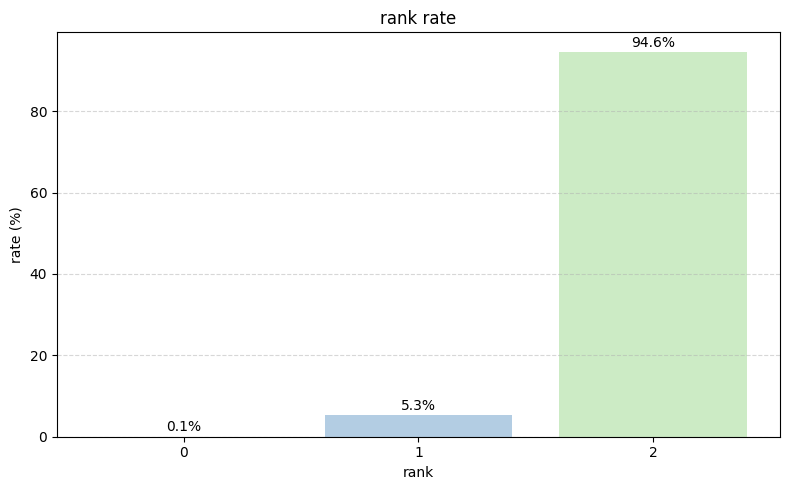

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# 5Îã®Í≥Ñ Îì±Í∏â ‚Üí 3Îã®Í≥ÑÎ°ú Î¶¨Îß§Ìïë
def remap_grades(preds):
    return pd.Series(preds).map(lambda x: 0 if x in [0, 1] else 1 if x == 2 else 2)

# Îì±Í∏â Î¶¨Îß§Ìïë Ï†ÅÏö©
df['Í≥†Í∞ùÎì±Í∏â_Î¶¨Îß§Ìïë'] = remap_grades(df['Í≥†Í∞ùÎì±Í∏â'])

# Î¶¨Îß§ÌïëÎêú Îì±Í∏â ÎπÑÏú® Í≥ÑÏÇ∞
grade_ratio = df['Í≥†Í∞ùÎì±Í∏â_Î¶¨Îß§Ìïë'].value_counts(normalize=True, dropna=False)
grade_ratio = (grade_ratio * 100).round(2)
grade_ratio = grade_ratio.sort_index()  # ÏàúÏÑú Ï†ïÎ†¨ (0 ‚Üí 1 ‚Üí 2)

# Ïù∏Îç±Ïä§Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (Í∑∏ÎûòÌîÑ ÎùºÎ≤®Ïö©)
grade_ratio.index = grade_ratio.index.astype(str)

# üé® Ïª¨Îü¨Îßµ ÏÇ¨Ïö©ÌïòÏó¨ ÏÉâÏÉÅ Îã§Î•¥Í≤å ÏßÄÏ†ï
colors = plt.cm.Pastel1(range(len(grade_ratio)))

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(8, 5))
bars = plt.bar(grade_ratio.index, grade_ratio.values, color=colors)
plt.xlabel('rank')
plt.ylabel('rate (%)')
plt.title('rank rate')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# ÎßâÎåÄ ÏúÑÏóê ÌçºÏÑºÌä∏ ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏

In [ ]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype('int64')

In [ ]:
object_cols = df.select_dtypes(include='object').columns

In [ ]:
!pip install statsmodels

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.8/10.8 MB 52.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 232.9/232.9 kB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install tqdm

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from tqdm import tqdm  # ÏßÑÌñâÎ•† ÌëúÏãú
import pandas as pd

# 1. Ïà´ÏûêÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉù
X = df.select_dtypes(include=['int64']).copy()

# 2. ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X = add_constant(X)

# 3. tqdm Ï†ÅÏö©
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in tqdm(range(X.shape[1]), desc="Calculating VIF")]

# 4. Í≤∞Í≥º Ï†ïÎ†¨
vif_df = vif_df.sort_values(by='VIF', ascending=False)


Calculating VIF: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [01:15<00:00,  3.29s/it]


In [ ]:
# ÏßÄÏàò ÌëúÍ∏∞ ÏóÜÏù¥ ÏÜåÏàòÏ†ê Îëê ÏûêÎ¶¨Î°ú ÌëúÏãú
pd.options.display.float_format = '{:.2f}'.format

# Îã§Ïãú Ï∂úÎ†•
print(vif_df)


     feature    VIF
0      const 314.80
15  Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÏÑúÏö∏  40.76
8   Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÍ∏∞  39.38
17  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïù∏Ï≤ú  13.27
14  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Î∂ÄÏÇ∞  12.30
13  Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÎåÄÏ†Ñ  11.86
22  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï∂©Î∂Å   9.53
9   Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÎÇ®   8.47
10  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í≤ΩÎ∂Å   8.10
12  Í±∞Ï£ºÏãúÎèÑÎ™Ö_ÎåÄÍµ¨   7.30
16  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ïö∏ÏÇ∞   6.53
18  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†ÑÎÇ®   5.37
11  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Í¥ëÏ£º   3.92
21  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï∂©ÎÇ®   3.40
2       ÏäπÏù∏Í∏àÏï°   2.10
19  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†ÑÎ∂Å   2.09
5       Í≥†Í∞ùÎì±Í∏â   1.80
6   ÏàòÏã†_ÏöîÍµ¨Î∂àÏòàÍ∏à   1.56
7       ÎåÄÏ∂úÍ∏àÏï°   1.34
20  Í±∞Ï£ºÏãúÎèÑÎ™Ö_Ï†úÏ£º   1.21
1       ÏäπÏù∏Í±¥Ïàò   1.10
3        Ïó∞Î†πÎåÄ   1.04
4     ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú   1.01


# DÎ°ú ÏÉòÌîåÎßÅ

In [ ]:
# SegmentÍ∞Ä  CÏù∏ Îç∞Ïù¥ÌÑ∞ Ïàò ÌôïÏù∏
target_class=3
target_count=df[df['Í≥†Í∞ùÎì±Í∏â']==target_class].shape[0]

In [ ]:
df['Í≥†Í∞ùÎì±Í∏â'].unique()

array([3, 4, 2, 0, 1])

In [ ]:
from sklearn.utils import resample

#ÌÅ¥ÎûòÏä§Î≥Ñ Î∂ÑÌï†
dfs = []
for segment in df['Í≥†Í∞ùÎì±Í∏â'].unique():
    class_df = df[df['Í≥†Í∞ùÎì±Í∏â']==segment]

    if segment==target_class:
        #AÎäî Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ
        dfs.append(class_df)
    elif class_df.shape[0] > target_count:
        #ÏàòÍ∞Ä ÎßéÏúºÎ©¥ Ïñ∏ÎçîÏÉòÌîåÎßÅ #replace=FalseÎäî Ï§ëÎ≥µ Î∞©ÏßÄ
        sampled = resample(class_df, replace=False, n_samples=target_count, random_state=10)
        dfs.append(sampled)
    else:
        #ÏàòÍ∞Ä Ï†ÅÏúºÎ©¥ Ïò§Î≤ÑÏÉòÌîåÎßÅ #replace=TrueÎäî Ï§ëÎ≥µ ÌóàÏö©
        sampled = resample(class_df, replace=True, n_samples=target_count, random_state=10)
        dfs.append(sampled)

In [ ]:
# ÌÅ¥ÎûòÏä§ Ïàò ÎßûÏ∂ò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ìï©ÏπòÍ∏∞
balanced_df= pd.concat(dfs).sample(frac=1,random_state=10).reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
balanced_df['Í≥†Í∞ùÎì±Í∏â_encoded']=le.fit_transform(balanced_df['Í≥†Í∞ùÎì±Í∏â'])

In [ ]:
X= balanced_df.drop(['Í±∞ÎûòÎÖÑÏõî','Í≥†Í∞ùID','Í≥†Í∞ùÎì±Í∏â','Í≥†Í∞ùÎì±Í∏â_encoded'],axis=1)
y= balanced_df['Í≥†Í∞ùÎì±Í∏â_encoded']

# Î™®Îç∏ÎßÅ

In [ ]:
# Î®ºÏ†Ä ÏÑ§Ïπò ÌïÑÏöî (ColabÏù¥ÎÇò Jupyter ÌôòÍ≤ΩÏóêÏÑúÎäî ÏïÑÎûò Ïã§Ìñâ ÌïÑÏöî)
!pip install xgboost catboost lightgbm --quiet

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 11.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.6/3.6 MB 88.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47.1/47.1 kB 2.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 291.7/291.7 MB 3.7 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Í∞úÎ≥Ñ Î™®Îç∏ Ï†ïÏùò
lgbm = LGBMClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cat = CatBoostClassifier(verbose=0, random_state=42)

# ÏïôÏÉÅÎ∏î Î™®Îç∏ Ï†ïÏùò (soft voting = ÌôïÎ•† Í∏∞Î∞ò ÌèâÍ∑†)
voting_dlf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm),
        ('xgb', xgb),
        ('cat', cat)
    ],
    voting='soft'
)

# Î™®Îç∏ ÌïôÏäµ
voting_dlf.fit(X, y)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 1746210, number of used features: 21
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:23:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('lgbm', LGBMClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7e6a2bf69a10>)],
                 voting='soft')

In [ ]:
# ÏòàÏ∏°
y_pred = voting_dlf.predict(X)

# ÌèâÍ∞Ä
from sklearn.metrics import f1_score, classification_report, confusion_matrix


print("‚úÖ F1 Score (macro):", f1_score(y, y_pred, average='macro'))
print("‚úÖ Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("‚úÖ Classification Report:\n", classification_report(y, y_pred,target_names = [str(cls) for cls in le.classes_]))

‚úÖ F1 Score (macro): 0.7992599744448793
‚úÖ Confusion Matrix:
 [[349242      0      0      0      0]
 [     0 349242      0      0      0]
 [ 23306   1141 203141  92033  29621]
 [  1808    134  63879 214875  68546]
 [   126     16   4380  59787 284933]]
‚úÖ Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97    349242
           1       1.00      1.00      1.00    349242
           2       0.75      0.58      0.65    349242
           3       0.59      0.62      0.60    349242
           4       0.74      0.82      0.78    349242

    accuracy                           0.80   1746210
   macro avg       0.80      0.80      0.80   1746210
weighted avg       0.80      0.80      0.80   1746210



In [ ]:
import pickle
# Î™®Îç∏ Ï†ÄÏû•
pickle.dump(voting_dlf,open('/content/drive/MyDrive/open/voting_model(D)','wb'))